In [3]:
library(Seurat)
library(Signac)
library(ggplot2)

Attaching SeuratObject



In [4]:
prefix  <- '/data/proj/GCB_MB/bcd_CT/single-cell/results/downscale/cellranger/H3K27me3/'
dataset <- c('nano_CT','nbiotech')

files.ls   <- list.files(paste0(prefix, dataset),full.names = TRUE)
files.names <- unlist(lapply(strsplit(files.ls,'/'),function(x){return(x[length(x)])}))
files.method <- c(rep(dataset[1],4),rep(dataset[2],4))

In [5]:
seurat.nbiotech <- readRDS(file='/data/proj/GCB_MB/bcd_CT/single-cell/results/nbiotech_data/data/seurat/H3K27me3_seurat_object.Rds')
seurat.nanoCT   <- readRDS(file='/data/proj/GCB_MB/bcd_CT/single-cell/results/multimodal_data/single_modality/H3K27me3/seurat/peaks/Seurat_object_clustered_renamed.Rds')


In [6]:
cells <- c(colnames(seurat.nanoCT), colnames(seurat.nbiotech))

In [7]:
fragments.summary.ls <- lapply(files.ls, function(x){
    fragments <- read.table(file=gzfile(paste0(x,'/outs/fragments_mod.tsv.gz')))
    fragments <- fragments[fragments$V4 %in% cells,]
    table(fragments$V4)
})

In [8]:
fragments.summary.df.ls <- lapply(1:length(fragments.summary.ls), function(x){
    x <- data.frame('name' = files.names[x], 
                    'nreads' = as.numeric(fragments.summary.ls[[x]]),
                   'method' = files.method[x])
    return(x)
})

In [9]:
fragments.summary.df <- do.call('rbind',fragments.summary.df.ls)
fragments.summary.df$name <- factor(fragments.summary.df$name,levels=unique(fragments.summary.df$name)[c(5:8,1:4)])

In [10]:
unique(fragments.summary.df$name)

[1] bcdCT_MB21_02 bcdCT_MB21_03 bcdCT_MB21_04 bcdCT_MB21_05 H3K27me3_N1  
[6] H3K27me3_N2   H3K27me3_N3   H3K27me3_N4  
8 Levels: H3K27me3_N1 H3K27me3_N2 H3K27me3_N3 H3K27me3_N4 ... bcdCT_MB21_05

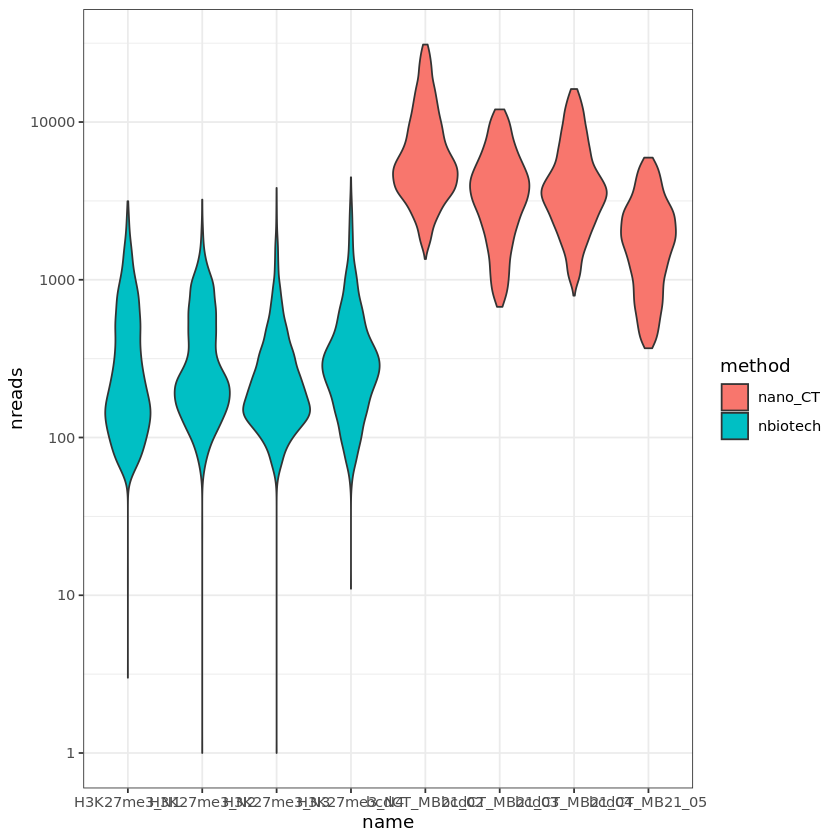

In [11]:
ggplot(data = fragments.summary.df) + geom_violin(aes(x=name,y=nreads,fill=method)) + scale_y_log10() + theme_bw()
ggsave('/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/revision/logUMI_violin_downscaled.pdf',width=5,height=3)

In [12]:
fragments.summary <- aggregate(fragments.summary.df$nreads,by=list(fragments.summary.df$name),FUN=median)

In [13]:
aggregate(fragments.summary.df$nreads,by=list(fragments.summary.df$name),FUN=median)
aggregate(fragments.summary.df$nreads,by=list(fragments.summary.df$method),FUN=median)

Group.1,x
<fct>,<dbl>
H3K27me3_N1,210.0
H3K27me3_N2,237.0
H3K27me3_N3,193.0
H3K27me3_N4,281.0
bcdCT_MB21_02,5376.5
bcdCT_MB21_03,3514.5
bcdCT_MB21_04,3677.0
bcdCT_MB21_05,1750.0


Group.1,x
<chr>,<dbl>
nano_CT,2949
nbiotech,221


In [14]:
mean(fragments.summary$x[5:8])
mean(fragments.summary$x[1:4])
mean(fragments.summary$x[5:8] / fragments.summary$x[1:4])

[1] 3579.5

[1] 230.25

[1] 16.42777